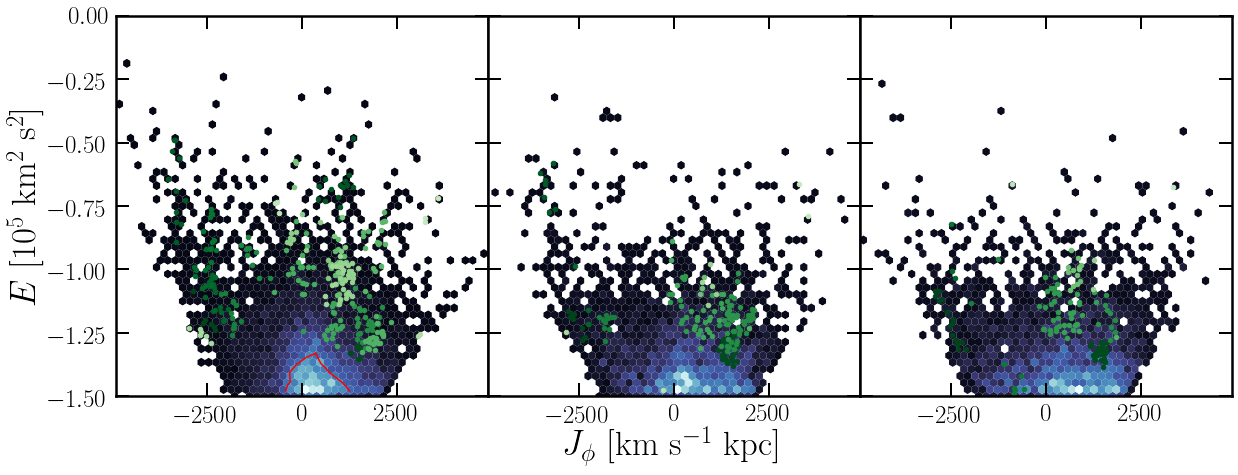

In [33]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from PlotFuncs import *
from LabFuncs import *
from Params import *
from HaloFuncs import *
from scipy.stats import norm
import pandas
import cmocean
from scipy.stats import gaussian_kde
from copy import copy

# Style
cmap = cmocean.cm.ice
cmap = copy(plt.get_cmap(cmap))
cmap.set_under('white', 1.0)
cont_col = 'crimson'
levels = [0.5,1.0]
gsize = 50
ncont_bins = 20



# Jphi
pltname = 'Action-Jphi-feh'
jmin = -4900.0
jmax = 4900.0
Emax = 0.0
Emin = -1.5
df = pandas.read_csv('../data/Gaia-SDSS.csv')
df1 = df.loc[(df['E'] > Emin*1e5)&(df['feh'] > -1.7)&(df['feh'] < -1.3)]
df2 = df.loc[(df['E'] > Emin*1e5)&(df['feh'] > -2.0)&(df['feh'] < -1.7)]
df3 = df.loc[(df['E'] > Emin*1e5)&(df['feh'] < -2.0)]
E1 = df1.E/1e5
J1 = df1.Jphi
E2 = df2.E/1e5
J2 = df2.Jphi
E3 = df3.E/1e5
J3 = df3.Jphi
xlab2 = '$J_\phi$ [km s$^{-1}$ kpc]'



######


fig,ax1,ax2,ax3 = MyTriplePlot('',r'$E$ [$10^5$ km$^2$ s$^2$]',xlab2,'','','',wspace=0.0,lfs=35)

# Load Shards
df_S = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
names = df_S.group_id.unique()

# Plot halo stars
ax1.hexbin(J1,E1,extent=(jmin,jmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax2.hexbin(J2,E2,extent=(jmin,jmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)
ax3.hexbin(J3,E3,extent=(jmin,jmax,Emin,Emax), gridsize=gsize,cmap=cmap,vmin=0.01,linewidths=0.0)

# Plot contours
H,x1,y1 = histogram2d(J1,E1,range=[[jmin,jmax],[Emin,Emax]],bins=ncont_bins)
ax1.contour((x1[1:]+x1[0:-1])/2,(y1[1:]+y1[0:-1])/2,H.T/amax(H),levels=levels,colors=cont_col,linestyles='solid',lw=3)
H,x1,y1 = histogram2d(J2,E2,range=[[jmin,jmax],[Emin,Emax]],bins=ncont_bins)
ax2.contour((x1[1:]+x1[0:-1])/2,(y1[1:]+y1[0:-1])/2,H.T/amax(H),levels=levels,colors=cont_col,linestyles='solid',lw=3)
H,x1,y1 = histogram2d(J3,E3,range=[[jmin,jmax],[Emin,Emax]],bins=ncont_bins)
ax3.contour((x1[1:]+x1[0:-1])/2,(y1[1:]+y1[0:-1])/2,H.T/amax(H),levels=levels,colors=cont_col,linestyles='solid',lw=3)


# Plot shards
n_ex = 30
Examples = names[0:n_ex]
col_ex = flipud(cm.Greens(linspace(0,1,n_ex+10)))
points = zeros(shape=(size(x),2))
for i in range(0,n_ex):
    namei = Examples[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand0 = df.loc[around(df.ra,8).isin(Cand.ra)]
    Cand1 = df1.loc[around(df1.ra,8).isin(Cand.ra)]
    Cand2 = df2.loc[around(df2.ra,8).isin(Cand.ra)]
    Cand3 = df3.loc[around(df3.ra,8).isin(Cand.ra)]
    e0 = (Cand0.E/1e5).tolist()
    j0 = (Cand0.Jphi).tolist()
    e1 = (Cand1.E/1e5).tolist()
    j1 = (Cand1.Jphi).tolist()
    e2 = (Cand2.E/1e5).tolist()
    j2 = (Cand2.Jphi).tolist()
    e3 = (Cand3.E/1e5).tolist()
    j3 = (Cand3.Jphi).tolist()
    
#     points = array([j0,e0]).T
#     hull = ConvexHull(points)
#     x_edge = points[hull.vertices,0]
#     y_edge = points[hull.vertices,1]
#     ax1.fill(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),alpha=alph,color=col_ex[i,:],zorder=2)
#     ax1.plot(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),color=col_ex[i,:],lw=2,zorder=2)
#     ax2.fill(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),alpha=alph,color=col_ex[i,:],zorder=2)
#     ax2.plot(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),color=col_ex[i,:],lw=2,zorder=2)
#     ax3.fill(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),alpha=alph,color=col_ex[i,:],zorder=2)
#     ax3.plot(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),color=col_ex[i,:],lw=2,zorder=2)

    if size(j1)>0:
        ax1.plot(j1,e1,'.',color=col_ex[i,:],markersize=9)
        
    if size(j2)>0:
        ax2.plot(j2,e2,'.',color=col_ex[i,:],markersize=9)

    if size(j3)>0:
        ax3.plot(j3,e3,'.',color=col_ex[i,:],markersize=9)

ax1.set_xlim([jmin,jmax])
ax2.set_xlim([jmin,jmax])
ax3.set_xlim([jmin,jmax])
ax1.set_ylim([Emin,Emax])
ax2.set_ylim([Emin,Emax])
ax3.set_ylim([Emin,Emax])
ax2.set_yticklabels([])
ax3.set_yticklabels([])

# Save
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')                            

In [25]:
H

NameError: name 'H' is not defined

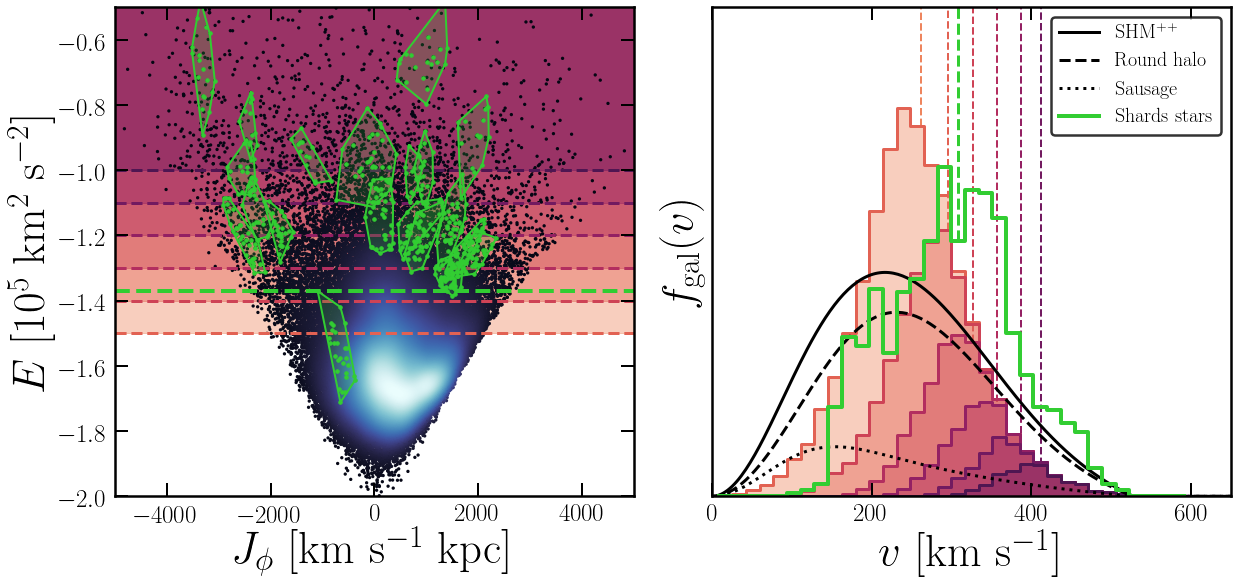

In [19]:
xlab1 = r'$J_\phi$ [km s$^{-1}$ kpc]'
ylab1 = r'$E$ [$10^5$ km$^2$ s$^{-2}$]'
xlab2 = r"$v$ [km s$^{-1}$]"
ylab2 = r"$f_{\rm gal}(v)$"
fig,ax1,ax2 = MyDoublePlot(xlab1,ylab1,xlab2,ylab2,wspace=0.15,size_y=9)

x1,y1,dens1 = PointScatter(df.Jphi,df.E/1e5)
ax1.scatter(x1, y1, c=dens1, s=11, edgecolor='',cmap=cmocean.cm.ice,label=None,rasterized=True)

jphimin = -5000.0
jphimax = 5000.0
Emin = -2.0
Emax = -0.5
ax1.set_ylim([Emin,Emax])
ax1.set_xlim([jphimin,jphimax])


# Plot some shards
shards_color = 'limegreen'
Examples = names[0:20]
n_ex = size(Examples)
points = zeros(shape=(size(x),2))
for i in range(0,n_ex):
    namei = Examples[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand_matched = df.loc[around(df.ra,8).isin(Cand.ra)]
    Ec = (Cand_matched.E/1e5).tolist()
    jr = (Cand_matched.JR).tolist()
    jphi = (Cand_matched.Jphi).tolist()
    jz = (Cand_matched.Jz).tolist()
    ax1.plot(jphi,Ec,'.',color=shards_color,markersize=7)
    
    points = array([jphi,Ec]).T
    hull = ConvexHull(points)
    x_edge = points[hull.vertices,0]
    y_edge = points[hull.vertices,1]
    ax1.fill(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),alpha=0.2,color=shards_color,zorder=2)
    ax1.plot(append(x_edge,x_edge[0]),append(y_edge,y_edge[0]),color=shards_color,lw=2,zorder=2)

    
# Second plott
def speeds(dfc):
    return sqrt((dfc.GalRVel)**2.0+(dfc.GalphiVel)**2.0+(dfc.GalzVel)**2.0)
  
n = 300
v = linspace(0.01,850.0,n)
v0 = SHMpp.RotationSpeed
v_esc = SHMpp.EscapeSpeed
sig_beta = SHMpp.SausageDispersionTensor
sig_iso = array([1.0,1.0,1.0])*v0/sqrt(2.0)
eta = 0.2
SCO = True
fv_Iso_gal = SpeedDist_Triaxial(v,0,sig_iso,GalFrame=True,SmoothCutoff=SCO) # Galactic frame Halo
fv_Saus_gal = SpeedDist_Triaxial(v,0,sig_beta,GalFrame=True,SmoothCutoff=SCO) # Galactic frame Sausage
fv0 = (1-eta)*fv_Iso_gal + eta*fv_Saus_gal

# Shards
nbins = 35
vv = sqrt((df_S.GalRVel)**2.0+(df_S.GalTVel)**2.0+(df_S.GalzVel)**2.0)
h_shards,vbins = histogram(vv,bins=nbins,normed=True,range=(0,600))
vc = (vbins[1:]+vbins[0:-1])/2
    
df_E0 = df.loc[(df['E'] > -1.5e5)]
df_E1 = df.loc[(df['E'] > -1.4e5)]
df_E2 = df.loc[(df['E'] > -1.3e5)]
df_E3 = df.loc[(df['E'] > -1.2e5)]
df_E4 = df.loc[(df['E'] > -1.1e5)]
df_E5 = df.loc[(df['E'] > -1.0e5)]

h_E0,_ = histogram(speeds(df_E0),bins=nbins,normed=True,range=(0,600))
h_E1,_ = histogram(speeds(df_E1),bins=nbins,normed=True,range=(0,600))
h_E2,_ = histogram(speeds(df_E2),bins=nbins,normed=True,range=(0,600))
h_E3,_ = histogram(speeds(df_E3),bins=nbins,normed=True,range=(0,600))
h_E4,_ = histogram(speeds(df_E4),bins=nbins,normed=True,range=(0,600))
h_E5,_ = histogram(speeds(df_E5),bins=nbins,normed=True,range=(0,600))

h_E0 *= (shape(df_E0)[0])/(1.0*shape(df_E0)[0])
h_E1 *= (shape(df_E1)[0])/(1.0*shape(df_E0)[0])
h_E2 *= (shape(df_E2)[0])/(1.0*shape(df_E0)[0])
h_E3 *= (shape(df_E3)[0])/(1.0*shape(df_E0)[0])
h_E4 *= (shape(df_E4)[0])/(1.0*shape(df_E0)[0])
h_E5 *= (shape(df_E5)[0])/(1.0*shape(df_E0)[0])

col_ex = (cmocean.cm.matter(linspace(0,1,11)))
coff = 3
alph = 0.4

ax1.fill_between([jphimin,jphimax],[-1.0,-1.0],y2=0.0,color=col_ex[5+coff,:],alpha=alph,zorder=-1)
ax1.fill_between([jphimin,jphimax],[-1.1,-1.1],y2=0.0,color=col_ex[4+coff,:],alpha=alph,zorder=-2)
ax1.fill_between([jphimin,jphimax],[-1.2,-1.2],y2=0.0,color=col_ex[3+coff,:],alpha=alph,zorder=-3)
ax1.fill_between([jphimin,jphimax],[-1.3,-1.3],y2=0.0,color=col_ex[2+coff,:],alpha=alph,zorder=-4)
ax1.fill_between([jphimin,jphimax],[-1.4,-1.4],y2=0.0,color=col_ex[1+coff,:],alpha=alph,zorder=-5)
ax1.fill_between([jphimin,jphimax],[-1.5,-1.5],y2=0.0,color=col_ex[0+coff,:],alpha=alph,zorder=-6)

ax1.plot([jphimin,jphimax],[-1.37,-1.37],'--',color=shards_color,lw=4,zorder=1)
ax1.plot([jphimin,jphimax],[-1,-1],'--',color=col_ex[6+coff,:],lw=3,zorder=1)
ax1.plot([jphimin,jphimax],[-1.1,-1.1],'--',color=col_ex[5+coff,:],lw=3,zorder=1)
ax1.plot([jphimin,jphimax],[-1.2,-1.2],'--',color=col_ex[4+coff,:],lw=3,zorder=1)
ax1.plot([jphimin,jphimax],[-1.3,-1.3],'--',color=col_ex[3+coff,:],lw=3,zorder=1)
ax1.plot([jphimin,jphimax],[-1.4,-1.4],'--',color=col_ex[2+coff,:],lw=3,zorder=1)
ax1.plot([jphimin,jphimax],[-1.5,-1.5],'--',color=col_ex[1+coff,:],lw=3,zorder=1)

ax2.fill_between(vc,1e3*h_E0,y2=0,color=col_ex[0+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax2.fill_between(vc,1e3*h_E1,y2=0,color=col_ex[1+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax2.fill_between(vc,1e3*h_E2,y2=0,color=col_ex[2+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax2.fill_between(vc,1e3*h_E3,y2=0,color=col_ex[3+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax2.fill_between(vc,1e3*h_E4,y2=0,color=col_ex[4+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax2.fill_between(vc,1e3*h_E5,y2=0,color=col_ex[5+coff,:],lw=None,alpha=alph,step='pre',zorder=0)

ax2.step(vc,1e3*h_E0,'-',color=col_ex[1+coff,:],lw=3)
ax2.step(vc,1e3*h_E1,'-',color=col_ex[2+coff,:],lw=3)
ax2.step(vc,1e3*h_E2,'-',color=col_ex[3+coff,:],lw=3)
ax2.step(vc,1e3*h_E3,'-',color=col_ex[4+coff,:],lw=3)
ax2.step(vc,1e3*h_E4,'-',color=col_ex[5+coff,:],lw=3)
ax2.step(vc,1e3*h_E5,'-',color=col_ex[6+coff,:],lw=3)

ax2.plot(v,1e3*fv0,'k-',lw=3,label=r'SHM$^{++}$')
ax2.plot(v,1e3*(1-eta)*fv_Iso_gal,'k--',lw=3,label='Round halo')
ax2.plot(v,1e3*eta*fv_Saus_gal,'k:',lw=3,label='Sausage')
ax2.step(vc,1e3*h_shards,'-',color=shards_color,lw=4,label='Shards stars')

mean_shards = mean(vv)
hmean_shards = 1e3*h_shards[argmin(abs(vc-mean_shards))]
ax2.plot([mean_shards,mean_shards],[hmean_shards,10.0],'--',color=shards_color,lw=3)
mean0 = mean(speeds(df_E0))
mean1 = mean(speeds(df_E1))
mean2 = mean(speeds(df_E2))
mean3 = mean(speeds(df_E3))
mean4 = mean(speeds(df_E4))
mean5 = mean(speeds(df_E5))
hmean0 = 1e3*h_E0[argmin(abs(vc-mean0))]
hmean1 = 1e3*h_E1[argmin(abs(vc-mean1))]
hmean2 = 1e3*h_E2[argmin(abs(vc-mean2))]
hmean3 = 1e3*h_E3[argmin(abs(vc-mean3))]
hmean4 = 1e3*h_E4[argmin(abs(vc-mean4))]
hmean5 = 1e3*h_E5[argmin(abs(vc-mean5))]

ax2.plot([mean0,mean0],[hmean0,10.0],'--',color=col_ex[0+coff,:],lw=2,zorder=-10)
ax2.plot([mean1,mean1],[hmean1,10.0],'--',color=col_ex[1+coff,:],lw=2,zorder=-10)
ax2.plot([mean2,mean2],[hmean2,10.0],'--',color=col_ex[2+coff,:],lw=2,zorder=-10)
ax2.plot([mean3,mean3],[hmean3,10.0],'--',color=col_ex[3+coff,:],lw=2,zorder=-10)
ax2.plot([mean4,mean4],[hmean4,10.0],'--',color=col_ex[4+coff,:],lw=2,zorder=-10)
ax2.plot([mean5,mean5],[hmean5,10.0],'--',color=col_ex[5+coff,:],lw=2,zorder=-10)

# Legend lines
leg = ax2.legend(loc='upper right',fontsize=20,edgecolor='k')
leg.get_frame().set_linewidth(2.5)
ax2.set_xlim([0,650])
ax2.set_ylim(bottom=0.0,top=8.)
ax2.set_yticks([])
#plt.gcf().text(0.55,0.75,ylab2,fontsize=40)

# Save
plt.show()
pltname = 'Actions-fv'
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')                            


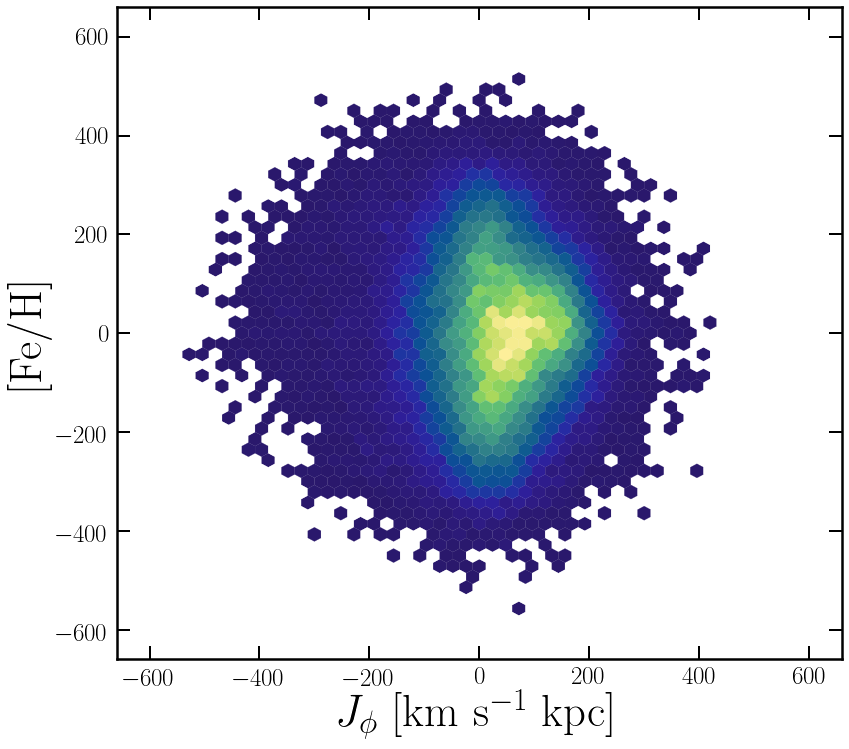

In [35]:
xlab1 = r"$J_\phi$ [km s$^{-1}$ kpc]"
ylab1 = r"[Fe/H]"
fig,ax1 = MySquarePlot(xlab1,ylab1)

cmap = cmocean.cm.haline
cmap = copy(plt.get_cmap(cmap))
cmap.set_under('white', 1.0)

ax1.hexbin(df.GalJphiVel,df.feh,extent=(-5000,5000,-600,600), gridsize=50,cmap=cmap,vmin=0.01,linewidths=0.2)

# Plot some shards
shards_color = 'limegreen'
Examples = names[0:30]
n_ex = size(Examples)
points = zeros(shape=(size(x),2))
for i in range(0,n_ex):
    namei = Examples[i]
    Cand = df_S.loc[df_S['group_id'] == namei]
    Cand_matched = df.loc[around(df.ra,8).isin(Cand.ra)]
    Ec = (Cand_matched.E/1e5).tolist()
    jr = (Cand_matched.JR).tolist()
    jphi = (Cand_matched.Jphi).tolist()
    jz = (Cand_matched.Jz).tolist()
    ax1.plot(jphi,Ec,'.',color=shards_color,markersize=7)
    
# Save
plt.show()
#pltname = 'Jphi-feh'
#fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
#fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')                            

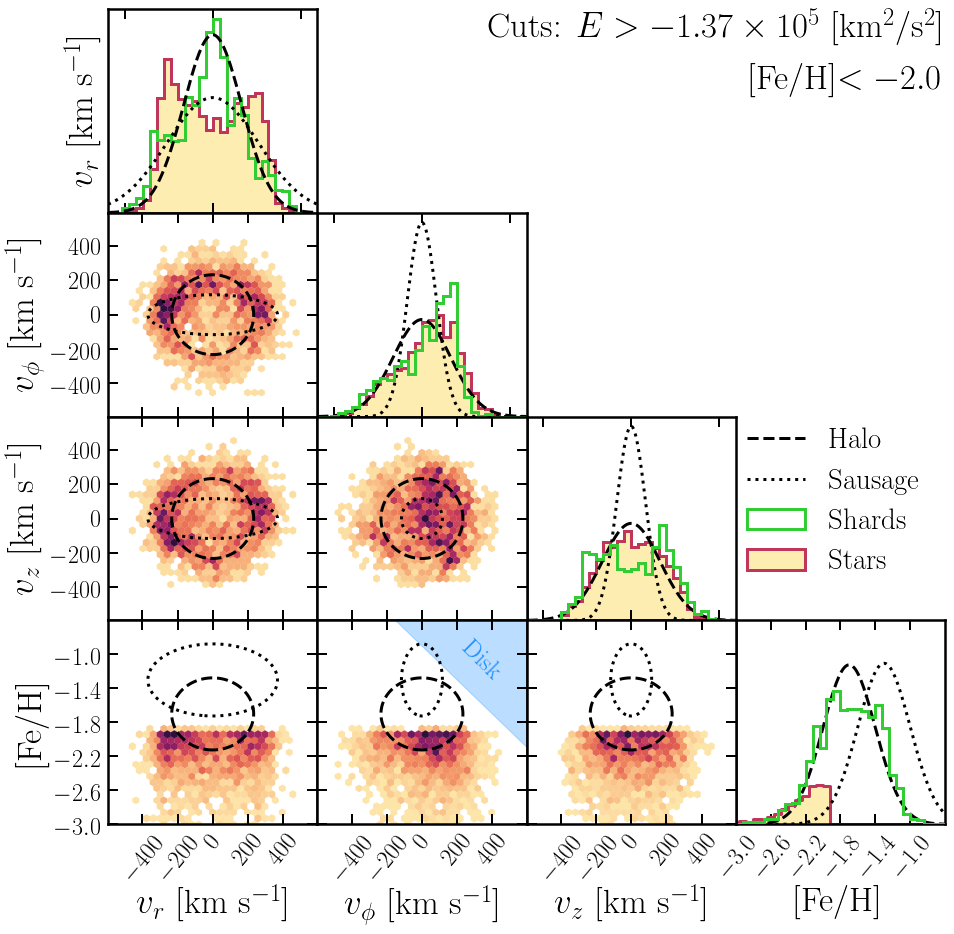

In [49]:
# DATA TO USE
from copy import copy



# dfc = df.loc[(df['E'] > -1.37e5)]
# pltname = 'fv-feh2D'
# txt = r'{\bf Cut off}: $E>-1.37\times 10^5$ [km$^2$/s$^2$]'
# cmap = cmocean.cm.matter
# col_ex = (cmocean.cm.matter(linspace(0,1,10)))
# nbins_1D = 50
# nbins_2D = 40
# fehnorm = 1.0


dfc = df.loc[(df['E'] > -1.37e5)&(df['feh'] < -1.9)]
pltname = 'fv-feh2D-wmetallicitycut'
txt = array([r'Cuts: $E>-1.37\times 10^5$ [km$^2$/s$^2$]', '[Fe/H]$<-2.0$'])
cmap = cmocean.cm.matter
col_ex = (cmocean.cm.matter(linspace(0,1,10)))
nbins_1D = 30
nbins_2D = 30
dfc1 = df.loc[df['feh'] < -1.9]
fehnorm = (shape(dfc)[0])/(1.0*shape(dfc1)[0])

vx = dfc.GalRVel
vy = dfc.GalphiVel
vz = dfc.GalzVel
feh = dfc.feh

vxS = df_S.GalRVel
vyS = df_S.GalTVel
vzS = df_S.GalzVel
fehS = df_S.feh


col_edge = col_ex[5,:]
col_face = col_ex[0,:]

cmap = copy(plt.get_cmap(cmap))
cmap.set_under('white', 1.0)

# INPUT PLOT
vmin=-595.0
vmax=595.0
nfine=500
#levels=[-6.2,-2.3,0]
levels = [-1,0]
tit_fontsize=30
col_an = 'k'
point_size = 8
lblsize = 31
xlblsize = 35
def_alph = 0.2
col_shards = 'limegreen'

fehmin = -3.0
fehmax = -0.6
vfine = linspace(vmin,vmax,nfine)
fehfine = linspace(fehmin,fehmax,nfine)
V1,V2 = meshgrid(vfine,vfine)

VF1,FEH = meshgrid(vfine,fehfine)

feh_iso = -1.7
feh_saus = -1.3

sig_beta = append(SHMpp.SausageDispersionTensor,0.3)
sig_iso = append(array([1.0,1.0,1.0])*v0/sqrt(2.0),0.3)

def fv_1D_an(vfine,sig,i):
    sig0_sq = sig[i]**2.0
    Norm = (1.0/sqrt(2*pi*sig0_sq))
    fv = Norm*exp(-vfine**2.0/(2*sig0_sq))
    fv /= trapz(fv,vfine)
    return fv

def fv_2D_an(V1,V2,sig,i,j):
    U = diag(1.0/sig**2.0)
    U0 = array([[U[i,i],U[i,j]],[U[j,i],U[j,j]]])
    V = vstack((U[i,:],U[j,:]))    
    V = delete(V, (i,j), axis=1)
    W = delete(U, (i,j), axis=0)
    W = delete(W, (i,j), axis=1)
    Uoff = linalg.multi_dot([V, linalg.inv(W), V.T])
    Ut = U0-Uoff
    Norm = (1.0/sqrt(2*pi))*sqrt(linalg.det(W)) 
    fv = Norm*exp(-0.5*(V1**2.0*Ut[0,0]+V2**2.0*Ut[1,1]+2*V1*V2*Ut[1,0]))  
    fv = log(fv)
    fv = fv-amax(fv)
    return fv



# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, axarr = plt.subplots(4, 4,figsize=(15,15))
gs = gridspec.GridSpec(4, 4)
gs.update(wspace=0.0,hspace=0.0)
ax_x = plt.subplot(gs[0,0])
ax_y = plt.subplot(gs[1,1])
ax_z = plt.subplot(gs[2,2])
ax_feh = plt.subplot(gs[3,3])

ax_yx = plt.subplot(gs[1,0])
ax_zx = plt.subplot(gs[2,0])
ax_zy = plt.subplot(gs[2,1])
ax_xfeh = plt.subplot(gs[3,0])
ax_yfeh = plt.subplot(gs[3,1])
ax_zfeh = plt.subplot(gs[3,2])

fig.delaxes(plt.subplot(gs[0,1]))
fig.delaxes(plt.subplot(gs[0,2]))
fig.delaxes(plt.subplot(gs[0,3]))
fig.delaxes(plt.subplot(gs[1,2]))
fig.delaxes(plt.subplot(gs[1,3]))
fig.delaxes(plt.subplot(gs[2,3]))

# 1D plots
ax_x.plot(vfine,fv_1D_an(vfine,sig_iso,0),'--',linewidth=3,color=col_an,label=r'SHM$^{++}$ (Dark matter)',zorder=5)
ax_x.plot(vfine,fv_1D_an(vfine,sig_beta,0),':',linewidth=3,color=col_an,label=r'SHM$^{++}$ (Dark matter)',zorder=5)
ax_x.hist(vx,range=[vmin,vmax],bins=nbins_1D,color=col_face,linewidth=3,normed=1,label=None)
ax_x.hist(vxS,range=[vmin,vmax],bins=30,color=col_shards,linewidth=3,histtype='step',normed=1,label=None,zorder=5)
ax_x.hist(vx,range=[vmin,vmax],bins=nbins_1D,color=col_edge,linewidth=3,histtype='step',normed=1,label=None)
ax_x.fill_between([-900,-900],[0.0001,0.0001],lw=3,edgecolor=col_edge,facecolor=col_face,label=None)
ax_x.set_ylabel(r'$v_r$ [km s$^{-1}$]',fontsize=xlblsize)

ax_y.hist(vy,range=[vmin,vmax],bins=nbins_1D,color=col_face,linewidth=3,normed=1)
ax_y.hist(vy,range=[vmin,vmax],bins=nbins_1D,color=col_edge,linewidth=3,histtype='step',normed=1)
ax_y.hist(vyS,range=[vmin,vmax],bins=30,color=col_shards,linewidth=3,histtype='step',normed=1,label='Shards',zorder=5)
ax_y.plot(vfine,fv_1D_an(vfine,sig_iso,1),'--',linewidth=3,color=col_an)
ax_y.plot(vfine,fv_1D_an(vfine,sig_beta,1),':',linewidth=3,color=col_an)


ax_z.hist(vz,range=[vmin,vmax],bins=nbins_1D,color=col_face,linewidth=3,normed=1)
ax_z.hist(vz,range=[vmin,vmax],bins=nbins_1D,color=col_edge,linewidth=3,histtype='step',normed=1)
ax_z.hist(vzS,range=[vmin,vmax],bins=30,color=col_shards,linewidth=3,histtype='step',normed=1,label='Shards',zorder=5)
ax_z.plot(vfine,fv_1D_an(vfine,sig_beta,2),':',linewidth=3,color=col_an)
ax_z.plot(vfine,fv_1D_an(vfine,sig_iso,2),'--',linewidth=3,color=col_an)

feh_hist,fehv = histogram(feh,range=[fehmin,fehmax],bins=nbins_1D,normed=1)
feh0 = (fehv[1:]+fehv[0:-1])/2.0
ax_feh.fill_between(feh0,feh_hist*fehnorm,color=col_face,label=None,step='pre')
ax_feh.step(feh0,feh_hist*fehnorm,color=col_edge,linewidth=3,label=None)
ax_feh.hist(fehS,range=[fehmin,fehmax],bins=30,color=col_shards,linewidth=3,histtype='step',normed=1,label='Shards',zorder=5)
#ax_feh.plot(1000*fehfine,fv_1D_an(fehfine-feh_iso,sig_iso,3),'-',linewidth=3,color=col_an,label=r'SHM$^{++}$',zorder=0)
ax_feh.plot(fehfine,fv_1D_an(fehfine-feh_iso,sig_iso,3),'--',linewidth=3,color=col_an,label='Halo',zorder=1)
ax_feh.plot(fehfine,fv_1D_an(fehfine-feh_saus,sig_beta,3),':',linewidth=3,color=col_an,label='Sausage',zorder=2)
ax_feh.fill_between(1000*feh[0:1],1000*feh[0:1],y2=-100.0,facecolor=col_face,edgecolor=col_edge,lw=3,label='Stars')
ax_feh.legend(fontsize=lblsize-2,frameon=False,bbox_to_anchor=(0.0, 2.0), loc=2, borderaxespad=0.)


# 2D plots
ax_yx.hexbin(vx,vy,extent=(vmin,vmax,vmin,vmax),gridsize=nbins_2D,cmap=cmap,vmin=0.001,linewidths=0.2)
ax_yx.contour(vfine,vfine,fv_2D_an(V1,V2,sig_iso,0,1),levels=levels,colors=col_an,linewidths=3,linestyles='dashed')
ax_yx.contour(vfine,vfine,fv_2D_an(V1,V2,sig_beta,0,1),levels=levels,colors=col_an,linewidths=3,linestyles='dotted')

ax_yx.set_ylabel(r'$v_\phi$ [km s$^{-1}$]',fontsize=xlblsize)

ax_zx.hexbin(vx,vz,extent=(vmin,vmax,vmin,vmax),gridsize=nbins_2D,cmap=cmap,vmin=0.001,linewidths=0.2)
ax_zx.contour(vfine,vfine,fv_2D_an(V1,V2,sig_iso,0,2),levels=levels,colors=col_an,linewidths=3,linestyles='dashed')
ax_zx.contour(vfine,vfine,fv_2D_an(V1,V2,sig_beta,0,2),levels=levels,colors=col_an,linewidths=3,linestyles='dotted')

ax_zx.set_ylabel(r'$v_z$ [km s$^{-1}$]',fontsize=xlblsize)

ax_zy.hexbin(vy,vz,extent=(vmin,vmax,vmin,vmax),gridsize=nbins_2D,cmap=cmap,vmin=0.001,linewidths=0.2)
ax_zy.contour(vfine,vfine,fv_2D_an(V1,V2,sig_iso,1,2),levels=levels,colors=col_an,linewidths=3,linestyles='dashed')
ax_zy.contour(vfine,vfine,fv_2D_an(V1,V2,sig_beta,1,2),levels=levels,colors=col_an,linewidths=3,linestyles='dotted')


ax_xfeh.hexbin(vx,feh,extent=(vmin,vmax,fehmin,fehmax),gridsize=nbins_2D,cmap=cmap,vmin=0.001,linewidths=0.2)
ax_xfeh.contour(vfine,fehfine,fv_2D_an(VF1,FEH-feh_iso,sig_iso,0,3),levels=levels,colors=col_an,linewidths=3,linestyles='dashed')
ax_xfeh.contour(vfine,fehfine,fv_2D_an(VF1,FEH-feh_saus,sig_beta,0,3),levels=levels,colors=col_an,linewidths=3,linestyles='dotted')


ax_yfeh.hexbin(vy,feh,extent=(vmin,vmax,fehmin,fehmax),gridsize=nbins_2D,cmap=cmap,vmin=0.001,linewidths=0.2)
ax_yfeh.contour(vfine,fehfine,fv_2D_an(VF1,FEH-feh_iso,sig_iso,1,3),levels=levels,colors=col_an,linewidths=3,linestyles='dashed')
ax_yfeh.contour(vfine,fehfine,fv_2D_an(VF1,FEH-feh_saus,sig_beta,1,3),levels=levels,colors=col_an,linewidths=3,linestyles='dotted')
ax_yfeh.fill_between(vfine,-0.002*vfine-0.9,y2=0.0,color='dodgerblue',alpha=0.3)
ax_yfeh.text(200,-1.0,'Disk',color='dodgerblue',fontsize=25,rotation=-45)

ax_zfeh.hexbin(vz,feh,extent=(vmin,vmax,fehmin,fehmax),gridsize=nbins_2D,cmap=cmap,vmin=0.001,linewidths=0.2)
ax_zfeh.contour(vfine,fehfine,fv_2D_an(VF1,FEH-feh_iso,sig_iso,2,3),levels=levels,colors=col_an,linewidths=3,linestyles='dashed')
ax_zfeh.contour(vfine,fehfine,fv_2D_an(VF1,FEH-feh_saus,sig_beta,2,3),levels=levels,colors=col_an,linewidths=3,linestyles='dotted')

vtx = array([-400,-200,0,200,400])
ftx = arange(-3.0,-0.6,0.4)
ax_xfeh.set_xticks(vtx)
ax_yfeh.set_xticks(vtx)
ax_zfeh.set_xticks(vtx)

ax_xfeh.set_yticks(ftx)
ax_yfeh.set_yticks(ftx)
ax_zfeh.set_yticks(ftx)
ax_feh.set_xticks(ftx)

ax_yx.set_xticks(vtx)
ax_zx.set_xticks(vtx)
ax_zy.set_xticks(vtx)
ax_yx.set_yticks(vtx)
ax_zx.set_yticks(vtx)
ax_zy.set_yticks(vtx)


# Tick params
ax_x.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)
ax_y.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)
ax_z.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)
ax_zx.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)
ax_yx.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)
ax_zy.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)
ax_xfeh.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)
ax_yfeh.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)
ax_zfeh.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)
ax_feh.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=7,labelsize=24)

for i in range(0,size(txt)):
    plt.gcf().text(0.9,0.88-i*0.05,txt[i],fontsize=35,horizontalalignment='right',verticalalignment='top')


ax_yx.set_xlim([vmin,vmax])
ax_yx.set_ylim([vmin,vmax])
ax_zx.set_xlim([vmin,vmax])
ax_zx.set_ylim([vmin,vmax])
ax_zy.set_xlim([vmin,vmax])
ax_zy.set_ylim([vmin,vmax])
ax_x.set_xlim([vmin,vmax])
ax_y.set_xlim([vmin,vmax])
ax_z.set_xlim([vmin,vmax])
ax_x.set_yticks([])
ax_y.set_yticks([])
ax_z.set_yticks([])
ax_feh.set_yticks([])
ax_x.set_yticklabels([])
ax_x.set_xticklabels([])
ax_y.set_yticklabels([])
ax_y.set_xticklabels([])
ax_z.set_yticklabels([])
ax_yx.set_xticklabels([])
ax_zy.set_yticklabels([])

ax_xfeh.set_ylim([fehmin,fehmax])
ax_yfeh.set_ylim([fehmin,fehmax])
ax_zfeh.set_ylim([fehmin,fehmax])
ax_yfeh.set_yticklabels([])
ax_zfeh.set_yticklabels([])

ax_feh.set_xlim([fehmin,fehmax])
ax_feh.set_ylim(bottom=0.0,top=1.7)
ax_xfeh.set_xlim([vmin,vmax])
ax_yfeh.set_xlim([vmin,vmax])
ax_zfeh.set_xlim([vmin,vmax])

ax_xfeh.set_ylabel(r'[Fe/H]',fontsize=xlblsize)
ax_xfeh.set_xlabel(r'$v_r$ [km s$^{-1}$]',fontsize=xlblsize)
ax_yfeh.set_xlabel(r'$v_\phi$ [km s$^{-1}$]',fontsize=xlblsize)
ax_zfeh.set_xlabel(r'$v_z$ [km s$^{-1}$]',fontsize=xlblsize)
ax_feh.set_xlabel(r'[Fe/H]',fontsize=xlblsize)



plt.sca(ax_feh)
plt.xticks(rotation=50)
plt.sca(ax_xfeh)
plt.xticks(rotation=50)
plt.sca(ax_yfeh)
plt.xticks(rotation=50)
plt.sca(ax_zfeh)
plt.xticks(rotation=50)


plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

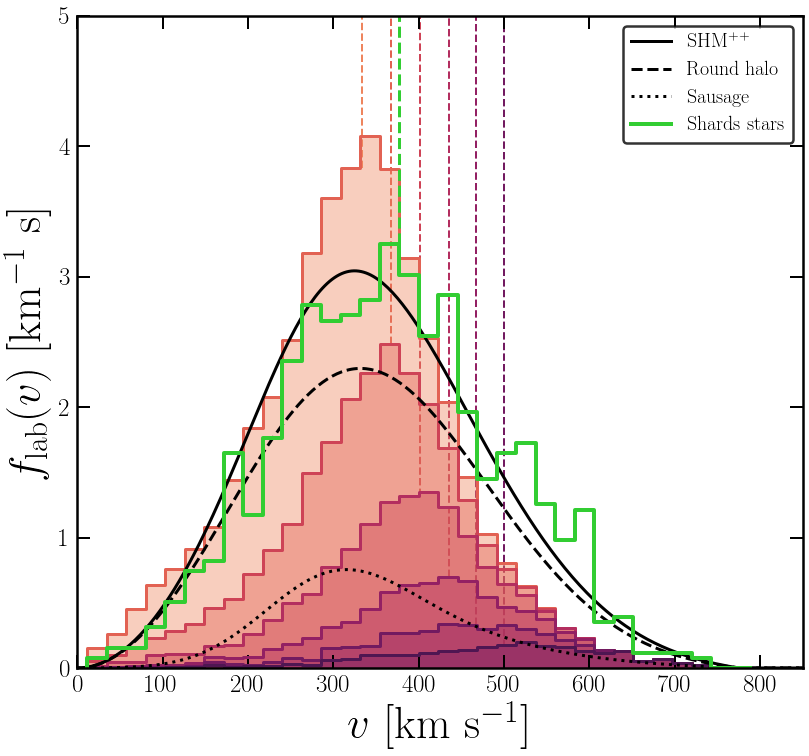

In [209]:
xlab1 = r"$v$ [km s$^{-1}$]"
ylab1 = r"$f_{\rm lab}(v)$ [km$^{-1}$ s]"
fig,ax1 = MySquarePlot(xlab1,ylab1)


day = 67
v_lab = LabVelocitySimple(day)
eta = 0.2
SCO = True
fv_Iso_lab = SpeedDist_Triaxial(v,67,sig_iso,SmoothCutoff=SCO) # Galactic frame Halo
fv_Saus_lab = SpeedDist_Triaxial(v,67,sig_beta,SmoothCutoff=SCO) # Galactic frame Sausage
fv0 = (1-eta)*fv_Iso_lab + eta*fv_Saus_lab

# Shards
nbins = 35
vv = sqrt((df_S.GalRVel-v_lab[0])**2.0+(df_S.GalTVel-v_lab[1])**2.0+(df_S.GalzVel-v_lab[2])**2.0)
h_shards,vbins = histogram(vv,bins=nbins,normed=True,range=(0,800))
vc = (vbins[1:]+vbins[0:-1])/2

def speeds(dfc):
    return sqrt((dfc.GalRVel-v_lab[0])**2.0+(dfc.GalphiVel-v_lab[1])**2.0+(dfc.GalzVel-v_lab[2])**2.0)

df_E0 = df.loc[(df['E'] > -1.5e5)]
df_E1 = df.loc[(df['E'] > -1.4e5)]
df_E2 = df.loc[(df['E'] > -1.3e5)]
df_E3 = df.loc[(df['E'] > -1.2e5)]
df_E4 = df.loc[(df['E'] > -1.1e5)]
df_E5 = df.loc[(df['E'] > -1.0e5)]

h_E0,_ = histogram(speeds(df_E0),bins=nbins,normed=True,range=(0,800))
h_E1,_ = histogram(speeds(df_E1),bins=nbins,normed=True,range=(0,800))
h_E2,_ = histogram(speeds(df_E2),bins=nbins,normed=True,range=(0,800))
h_E3,_ = histogram(speeds(df_E3),bins=nbins,normed=True,range=(0,800))
h_E4,_ = histogram(speeds(df_E4),bins=nbins,normed=True,range=(0,800))
h_E5,_ = histogram(speeds(df_E5),bins=nbins,normed=True,range=(0,800))

h_E0 *= (shape(df_E0)[0])/(1.0*shape(df)[0])
h_E1 *= (shape(df_E1)[0])/(1.0*shape(df)[0])
h_E2 *= (shape(df_E2)[0])/(1.0*shape(df)[0])
h_E3 *= (shape(df_E3)[0])/(1.0*shape(df)[0])
h_E4 *= (shape(df_E4)[0])/(1.0*shape(df)[0])
h_E5 *= (shape(df_E5)[0])/(1.0*shape(df)[0])

col_ex = (cmocean.cm.matter(linspace(0,1,11)))
coff = 3
alph = 0.4

ax1.fill_between(vc,1e3*h_E0,y2=0,color=col_ex[0+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax1.fill_between(vc,1e3*h_E1,y2=0,color=col_ex[1+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax1.fill_between(vc,1e3*h_E2,y2=0,color=col_ex[2+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax1.fill_between(vc,1e3*h_E3,y2=0,color=col_ex[3+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax1.fill_between(vc,1e3*h_E4,y2=0,color=col_ex[4+coff,:],lw=None,alpha=alph,step='pre',zorder=0)
ax1.fill_between(vc,1e3*h_E5,y2=0,color=col_ex[5+coff,:],lw=None,alpha=alph,step='pre',zorder=0)

ax1.step(vc,1e3*h_E0,'-',color=col_ex[1+coff,:],lw=3)
ax1.step(vc,1e3*h_E1,'-',color=col_ex[2+coff,:],lw=3)
ax1.step(vc,1e3*h_E2,'-',color=col_ex[3+coff,:],lw=3)
ax1.step(vc,1e3*h_E3,'-',color=col_ex[4+coff,:],lw=3)
ax1.step(vc,1e3*h_E4,'-',color=col_ex[5+coff,:],lw=3)
ax1.step(vc,1e3*h_E5,'-',color=col_ex[6+coff,:],lw=3)

ax1.plot(v,1e3*fv0,'k-',lw=3,label=r'SHM$^{++}$')
ax1.plot(v,1e3*(1-eta)*fv_Iso_lab,'k--',lw=3,label='Round halo')
ax1.plot(v,1e3*eta*fv_Saus_lab,'k:',lw=3,label='Sausage')
ax1.step(vc,1e3*h_shards,'-',color=shards_color,lw=4,label='Shards stars')

mean_shards = mean(vv)
hmean_shards = 1e3*h_shards[argmin(abs(vc-mean_shards))]
ax1.plot([mean_shards,mean_shards],[hmean_shards,10.0],'--',color=shards_color,lw=3)
mean0 = mean(speeds(df_E0))
mean1 = mean(speeds(df_E1))
mean2 = mean(speeds(df_E2))
mean3 = mean(speeds(df_E3))
mean4 = mean(speeds(df_E4))
mean5 = mean(speeds(df_E5))
hmean0 = 1e3*h_E0[argmin(abs(vc-mean0))]
hmean1 = 1e3*h_E1[argmin(abs(vc-mean1))]
hmean2 = 1e3*h_E2[argmin(abs(vc-mean2))]
hmean3 = 1e3*h_E3[argmin(abs(vc-mean3))]
hmean4 = 1e3*h_E4[argmin(abs(vc-mean4))]
hmean5 = 1e3*h_E5[argmin(abs(vc-mean5))]

ax1.plot([mean0,mean0],[hmean0,10.0],'--',color=col_ex[0+coff,:],lw=2,zorder=-10)
ax1.plot([mean1,mean1],[hmean1,10.0],'--',color=col_ex[1+coff,:],lw=2,zorder=-10)
ax1.plot([mean2,mean2],[hmean2,10.0],'--',color=col_ex[2+coff,:],lw=2,zorder=-10)
ax1.plot([mean3,mean3],[hmean3,10.0],'--',color=col_ex[3+coff,:],lw=2,zorder=-10)
ax1.plot([mean4,mean4],[hmean4,10.0],'--',color=col_ex[4+coff,:],lw=2,zorder=-10)
ax1.plot([mean5,mean5],[hmean5,10.0],'--',color=col_ex[5+coff,:],lw=2,zorder=-10)

# Legend lines
leg = ax1.legend(loc='upper right',fontsize=20,edgecolor='k')
leg.get_frame().set_linewidth(2.5)
ax1.set_xlim([0,850])
ax1.set_ylim(bottom=0.0,top=5.)
#plt.gcf().text(0.55,0.75,ylab2,fontsize=40)

# Save
plt.show()
pltname = 'fvlab_highE'
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')     

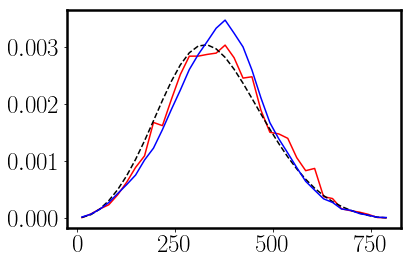

In [226]:
# Shards
nbins = 35
vv = sqrt((df_S.GalRVel-v_lab[0])**2.0+(df_S.GalTVel-v_lab[1])**2.0+(df_S.GalzVel-v_lab[2])**2.0)
h_shards,vbins = histogram(vv,bins=nbins,normed=True,range=(0,800))
vc = (vbins[1:]+vbins[0:-1])/2

# Smooth
fv_Iso_lab = SpeedDist_Triaxial(vc,67,sig_iso,SmoothCutoff=SCO) # Galactic frame Halo
fv_Saus_lab = SpeedDist_Triaxial(vc,67,sig_beta,SmoothCutoff=SCO) # Galactic frame Sausage
fv0 = (1-eta)*fv_Iso_lab + eta*fv_Saus_lab

# High-E
df_E = df.loc[(df['E'] > -1.37e5)]
h_E,_ = histogram(speeds(df_E),bins=nbins,normed=True,range=(0,800))

xi = 0.5
plt.plot(vc,(1-xi)*fv0 + xi*h_shards,'r-')
plt.plot(vc,fv0,'k--')

plt.plot(vc,(1-xi)*fv0 + xi*h_E,'b-')

plt.show()